## Importing and reading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
drugs = pd.read_csv("../../../../data/fda_approved_datasets/fda_approved_with_descriptors/fda_approved_padel.csv")
print(drugs.shape)
drugs.head()

(1895, 1890)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Separating explanatory and response variables

In [3]:
flag_columns = [
    "name",
    "chembl_id",
    "clean_smiles",
    "first_approval_year",
    "indication_class",
    "molecule_type",
    "withdrawn_flag",
    "therapeutic_flag",
    "polymer_flag",
    "inorganic_flag",
    "natural_product_flag",
    "parenteral",
    "topical",
    "oral",
    "ROMol",
]

drugs_features = drugs.drop(labels=flag_columns, axis=1)
print(drugs_features.shape)
drugs_features.head()

(1895, 1875)


,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,0.0,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,0.0,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,0.0,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,0.0,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Response variables
response_variable = drugs[flag_columns].drop(columns=["ROMol"])
response_variable.head(3)

,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,natural_product_flag,parenteral,topical,oral
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,False,False,False,True
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,False,False,False,True
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,False,False,False,True


In [5]:
# Explanatory variables (only descriptors)
explanatory_variables = drugs_features.iloc[:, 1:].copy()
explanatory_variables.head(3)

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,0.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,0.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,0.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171


## Infinity Values

One peculiarity of this dataset is that it hasa  values set as infinity. As this doesn't really make much sense for our calculations, and the number of occurances is significantly small, we will replace them for NaN values to proceed with further analysis.

In [6]:
# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))
print(f"Number of Infinity Values (np.inf) before replacing it with NaN: {num_infinity.sum()}")

# Replacing the negative and positive infinity values with nan
explanatory_variables = explanatory_variables.replace([np.inf, -np.inf], np.nan)

# Count the number of infinity values in the dataset
num_infinity = np.sum(np.isinf(explanatory_variables))

print(f"Number of Infinity Values (np.inf), after replacing it with NaN: {num_infinity.sum()}")

Number of Infinity Values (np.inf) before replacing it with NaN: 30
Number of Infinity Values (np.inf), after replacing it with NaN: 0


## Scaling of variables

Scaling is necessary so every variable is on the same scale and are comparable to each other. Non-parametric imputation as kNN are very sensible to the scale of the variables, so this is mandatory step.

In [7]:
# scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(explanatory_variables)

# Merging the column name with the scale data array
explanatory_variables_scaled = pd.DataFrame(scaled_data, columns=explanatory_variables.columns)
print(explanatory_variables_scaled.shape)
explanatory_variables_scaled.head()

(1895, 1874)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Zero variance filter

Below is a function that removes variance using a threshold. Because the data is scaled, the variance present is only either 1 or 0. Therefore, this function will only remove features with variance equals to zero.

In [8]:
def variance_threshold_selector(data, threshold=0.0):
    """
    Recieves a SCALED dataframe and returns the non-zero variance dataframe
    data: scaled dataframe
    threshold: minimum variance
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [9]:
# Zero variance filter over scaled data
explanatory_variables_no_low_var = variance_threshold_selector(explanatory_variables_scaled)
print(explanatory_variables_no_low_var.shape)
explanatory_variables_no_low_var.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling NaN Values

We can see here that we have 500 molecules with at least one NaN value.

There are 500 rows with at least one NaN value.


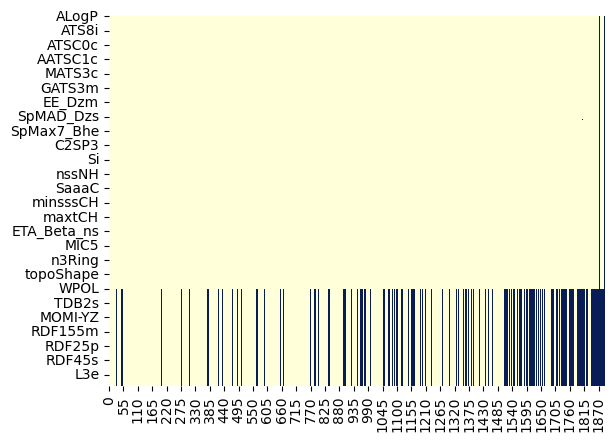

In [10]:
explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)]
print(f'There are {explanatory_variables_no_low_var[explanatory_variables_no_low_var.isnull().any(axis=1)].shape[0]} rows with at least one NaN value.')
g = sns.heatmap(explanatory_variables_no_low_var.isna().transpose(), cmap="YlGnBu", cbar=False)

### Get Index of Molecules with only NaN

There are some rows with only NaN, as PaDeL is somewhat known for being rather inefficient and retrieve a lot of errors. In the end of the notebook, the molecules are going to be dropped. I won't drop them now, because it would raise an error later on the concatenation step.

In [11]:
def find_rows_with_only_nan(df) -> list:
    """
    Recieves a dataset and returns the index of the rows with only NA values
    """
    nan_rows = df[df.isna().all(axis=1)]
    nan_rows_index = nan_rows.index.tolist()
    return nan_rows_index

In [12]:
molecules_to_remove = find_rows_with_only_nan(explanatory_variables_no_low_var)
print(f' There are {len(molecules_to_remove)} rows to remove')

 There are 8 rows to remove


### Get Names of Mostly NaN descriptors

Some descriptors have a lot of NA values. They can add noise to the dataset, but they can also contain important information with the structures with adequate computation. We will test to create models with both datasets, to see which one is better. Here, we will save the names of the descriptors that have lots of NaN, and drop them in the end of the notebook.

In [13]:
def get_nan_columns(df: pd.DataFrame, fraction: float):
    threshold = df.shape[0] * fraction
    columns = []
    for column in df.columns:
        if df[column].isna().sum() >= threshold:
            columns.append(column)
    return columns

In [14]:
columns_to_remove = get_nan_columns(explanatory_variables_no_low_var, fraction=0.2)
print(f'There are {len(columns_to_remove)} columns (descriptors) that have a lot of NaN values')

There are 431 columns (descriptors) that have a lot of NaN values


## k-Nearest Neighbor (Imputation of NaN values)

KNN imputation is effective for certain situations:

- Good for continuous numerical data with unpredictable missing values.
- Suitable when similar data points share similar values and there's a clear data structure.
- Works well for small to medium-sized datasets with manageable computational cost.
- Captures complex relationships with multiple features.
- Doesn't assume linearity and handles outliers.
  
However, KNN may not be ideal:

- In high-dimensional data due to the "curse of dimensionality."
- With highly sparse data, leading to unreliable imputations.
- For large datasets due to computational intensity.
- For categorical data (better for numerical data).
- In imbalanced datasets favoring majority class imputations.

Before using KNN, explore data and compare with other imputation methods for best performance.

Source: ChatGPT

It's important to note that, even though KNN seems very good for this situation, High Dimensionality is a problem here.

In [15]:
print(f"Number of Nan values: {explanatory_variables_no_low_var.isna().sum().sum()}")

Number of Nan values: 225823


In [16]:
selector = KNNImputer(n_neighbors=5)
explanatory_variables_fill_na = selector.fit_transform(explanatory_variables_no_low_var)

In [17]:
explanatory_variables_no_na = pd.DataFrame(explanatory_variables_fill_na, columns=explanatory_variables_no_low_var.columns)
print(explanatory_variables_no_na.shape)
explanatory_variables_no_na.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.122700,-0.271994,-1.317922,-1.867427,-1.32238,-1.323966,-1.712033,-1.887463,-1.435924,-0.056478,...,-1.197495,1.835419,0.663412,1.003914,-1.108395,-1.352440,-1.004723,-0.870580,-0.935053,0.298179
1,-0.236100,-0.190291,-1.209075,-1.822964,-1.32238,-1.323966,-1.670566,-1.802323,-1.435924,-0.056478,...,-0.072724,0.270976,0.876816,0.840564,-2.302535,-1.296684,-0.996441,-0.862315,-0.121005,-0.368169
2,-0.237732,-0.189772,-1.284284,-1.873645,-1.32238,-1.323966,-1.712033,-1.802323,-1.511031,-0.056478,...,0.181535,0.369860,0.793586,0.706307,2.753002,-1.312481,-1.003891,-0.867934,0.149980,2.422387
3,0.270602,-0.286837,-1.031362,-1.722519,-1.32238,-1.323966,-1.629100,-1.887463,-1.285708,-0.056478,...,-0.033983,-0.102851,6.966484,1.054841,-0.521463,-1.275850,-0.990470,-0.857145,-0.079715,4.080764
4,0.052770,-0.261147,-1.312939,-1.759372,-1.32238,-1.323966,-1.670566,-1.887463,-1.360816,-0.056478,...,-1.094167,0.961243,0.459547,1.240002,-0.596465,-1.244256,-0.967105,-0.840822,-1.074944,0.618458


Number of Nan values: 0


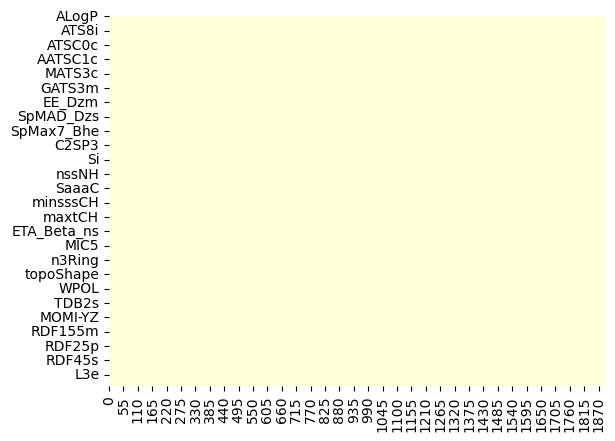

In [18]:
print(f"Number of Nan values: {explanatory_variables_no_na.isna().sum().sum()}")
g = sns.heatmap(explanatory_variables_no_na.isna().transpose(), cmap="YlGnBu", cbar=False)

## Descale Data

Now, we need to restore the data to the way it way before scaling. We do this fo rtwo reasons:

1. Some models need to be calculated on scaled data, some can't be.

2. For the models that need to use scaled data, the scaling process needs to be done separatly for the training and the testing datasets.

For descaling, it's essential to utilize the identical scaler object employed for the initial data scaling. However, the scaler object was originally fitted to the complete dataset, and along the notebook, several columns from that dataset were removed. We'll craft a provisional dataset that retains the original data but only has the selected columns. This new dataset will be scaled using a new scaler object, enabling us to accurately descale the data.


In [19]:
# creating temporary dataset
drugs_scaler = explanatory_variables[explanatory_variables_no_na.columns].copy()
drugs_scaler.shape

(1895, 1650)

In [20]:
# fitting the scaler object to the temporary dataset
descaler = StandardScaler()
_ = descaler.fit_transform(drugs_scaler)

In [21]:
# descaling
explanatory_variables_descaled = descaler.inverse_transform(explanatory_variables_no_na)
explanatory_variables_descaled = pd.DataFrame(explanatory_variables_descaled, columns=explanatory_variables_no_na.columns)

print(explanatory_variables_descaled.shape)
explanatory_variables_descaled.head()

(1895, 1650)


,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,9.0,4.0,5.0,0.0,...,0.584582,0.374936,0.571502,0.512439,0.306739,2.733780,1.928357,4.843419,0.439277,1.390680
1,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,10.0,5.0,5.0,0.0,...,0.714216,0.229644,0.585899,0.500742,0.221070,3.368770,2.462690,6.183482,0.571324,1.307711
2,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,9.0,5.0,4.0,0.0,...,0.743521,0.238828,0.580284,0.491128,0.583759,3.188855,1.982036,5.272534,0.615281,1.655171
3,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,11.0,4.0,7.0,0.0,...,0.718681,0.194926,0.996729,0.516086,0.348846,3.606039,2.848015,7.021565,0.578022,1.861660
4,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,10.0,4.0,6.0,0.0,...,0.596491,0.293750,0.557749,0.529345,0.343465,3.965855,4.355573,9.667852,0.416585,1.430559


Here we can compare a few columns of the dataset before the feature selection, and after descaling

In [22]:
explanatory_variables_descaled[["ALogP", "ALogp2", "AMR", "apol"]]

,ALogP,ALogp2,AMR,apol
0,-0.469500,0.220430,11.199700,8.393965
1,-1.085200,1.177659,15.430500,9.557965
2,-1.088000,1.183744,12.507200,8.231172
3,-0.215700,0.046526,22.338100,12.187551
4,-0.589500,0.347510,11.393400,11.222758
...,...,...,...,...
1890,-10.075500,101.515700,255.696400,197.052612
1891,-0.680053,3.407116,62.426447,57.281853
1892,-14.644900,214.473096,346.425200,229.983230
1893,-0.680053,3.407116,62.426447,57.281853


In [23]:
drugs[["ALogP", "ALogp2", "AMR", "apol"]]

,ALogP,ALogp2,AMR,apol
0,-0.4695,0.220430,11.1997,8.393965
1,-1.0852,1.177659,15.4305,9.557965
2,-1.0880,1.183744,12.5072,8.231172
3,-0.2157,0.046526,22.3381,12.187551
4,-0.5895,0.347510,11.3934,11.222758
...,...,...,...,...
1890,-10.0755,101.515700,255.6964,197.052612
1891,NaN,NaN,NaN,NaN
1892,-14.6449,214.473096,346.4252,229.983230
1893,NaN,NaN,NaN,NaN


## Remove Highly Correlated Features

It is very important to remove feature with high correlation

In [24]:
def remove_high_corr(df, corr_threshold):
  '''DataFrame, float --> DataFrame

  -----------------------------------------------------------------------------

  This fuction recieved a df and a threshold value for correlation. It will than,
  for each pair or features with correlation above the threshold, select only one.
  It will than return the df without those variables.'''

  #Correlation matrix
  corr_matrix = df.corr().abs()

  #Selecting upper triangle from correlation matrix
  corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

  #Selecting variables to be removed
  remove = []

  for col in corr_matrix.columns:
    if any(corr_matrix[col] > corr_threshold):
      remove.append(col)  
  
  print(f'Number of features removed: {len(remove)}')

  return df.drop(remove, axis = 1)

In [26]:
molecules_features_no_high_corr = remove_high_corr(explanatory_variables_descaled, 0.9)
print(molecules_features_no_high_corr.shape)
molecules_features_no_high_corr.head()

Number of features removed: 977
(1895, 673)


,ALogP,ALogp2,AMR,apol,naAromAtom,nB,nN,nO,nS,nP,...,E3m,Dm,E1v,E2v,E3v,Dv,E1p,E2p,E3p,Dp
0,-0.4695,0.220430,11.1997,8.393965,0.0,0.0,3.0,0.0,0.0,0.0,...,0.005958,0.515212,0.310788,0.357098,0.090328,0.758214,0.411070,0.390918,0.184991,0.986980
1,-1.0852,1.177659,15.4305,9.557965,0.0,0.0,1.0,2.0,0.0,0.0,...,0.006508,0.854144,0.401545,0.347670,0.069901,0.819116,0.432613,0.306092,0.139268,0.877973
2,-1.0880,1.183744,12.5072,8.231172,0.0,0.0,2.0,2.0,0.0,0.0,...,0.075943,0.775736,0.394651,0.323083,0.343533,1.061267,0.435733,0.336457,0.564932,1.337122
3,-0.2157,0.046526,22.3381,12.187551,0.0,0.0,1.0,0.0,1.0,0.0,...,0.019060,0.688684,0.517559,0.245330,0.125336,0.888225,0.493958,0.355364,0.203484,1.052806
4,-0.5895,0.347510,11.3934,11.222758,0.0,0.0,0.0,1.0,1.0,0.0,...,0.033381,1.027318,0.466378,0.352577,0.126562,0.945518,0.501162,0.387027,0.200183,1.088371


## Re-join response and explanatory variables

In [27]:
drugs_processed = pd.concat([response_variable, molecules_features_no_high_corr], axis=1)

In [28]:
print(drugs_processed.shape)
drugs_processed.head()

(1895, 687)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,E3m,Dm,E1v,E2v,E3v,Dv,E1p,E2p,E3p,Dp
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.005958,0.515212,0.310788,0.357098,0.090328,0.758214,0.411070,0.390918,0.184991,0.986980
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.006508,0.854144,0.401545,0.347670,0.069901,0.819116,0.432613,0.306092,0.139268,0.877973
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.075943,0.775736,0.394651,0.323083,0.343533,1.061267,0.435733,0.336457,0.564932,1.337122
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.019060,0.688684,0.517559,0.245330,0.125336,0.888225,0.493958,0.355364,0.203484,1.052806
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.033381,1.027318,0.466378,0.352577,0.126562,0.945518,0.501162,0.387027,0.200183,1.088371


## Drop Molecules That Only Have NaN Values

We have saved the index of molecules that only have NaN values. We will remove them here, as removing them before would create problems to descale the data.

In [29]:
drugs_processed_no_na = drugs_processed.drop(molecules_to_remove, axis=0)

In [30]:
print(drugs_processed_no_na.shape)
drugs_processed_no_na.head()

(1887, 687)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,E3m,Dm,E1v,E2v,E3v,Dv,E1p,E2p,E3p,Dp
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,0.005958,0.515212,0.310788,0.357098,0.090328,0.758214,0.411070,0.390918,0.184991,0.986980
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,0.006508,0.854144,0.401545,0.347670,0.069901,0.819116,0.432613,0.306092,0.139268,0.877973
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,0.075943,0.775736,0.394651,0.323083,0.343533,1.061267,0.435733,0.336457,0.564932,1.337122
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,0.019060,0.688684,0.517559,0.245330,0.125336,0.888225,0.493958,0.355364,0.203484,1.052806
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,0.033381,1.027318,0.466378,0.352577,0.126562,0.945518,0.501162,0.387027,0.200183,1.088371


## Drop Columns With High NaN Count

Here, we will drop the columns that we save in the `columns_to_remove` list.

In [31]:
molecules_processed_no_high_na_features = drugs_processed_no_na.copy()
for feature in columns_to_remove:
    try:
        molecules_processed_no_high_na_features = molecules_processed_no_high_na_features.drop([feature], axis=1)
    except KeyError:
        print(f"The feature {feature} was already removed")

The feature TDB2u was already removed
The feature TDB8u was already removed
The feature TDB2m was already removed
The feature TDB3m was already removed
The feature TDB4m was already removed
The feature TDB5m was already removed
The feature TDB6m was already removed
The feature TDB7m was already removed
The feature TDB8m was already removed
The feature TDB9m was already removed
The feature TDB1v was already removed
The feature TDB2v was already removed
The feature TDB3v was already removed
The feature TDB4v was already removed
The feature TDB5v was already removed
The feature TDB6v was already removed
The feature TDB7v was already removed
The feature TDB8v was already removed
The feature TDB9v was already removed
The feature TDB2e was already removed
The feature TDB3e was already removed
The feature TDB6e was already removed
The feature TDB7e was already removed
The feature TDB8e was already removed
The feature TDB9e was already removed
The feature TDB10e was already removed
The feature

In [32]:
print(molecules_processed_no_high_na_features.shape)
molecules_processed_no_high_na_features.head()

(1887, 595)


,name,chembl_id,clean_smiles,first_approval_year,indication_class,molecule_type,withdrawn_flag,therapeutic_flag,polymer_flag,inorganic_flag,...,JGI7,JGI8,JGI9,JGI10,VE1_D,VE2_D,VR1_D,VR2_D,SRW5,XLogP
0,GUANIDINE HYDROCHLORIDE,CHEMBL1200728,N=C(N)N,1939,NaN,Small molecule,False,True,False,False,...,-1.734723e-18,0.0,8.673617e-19,0.0,1.110223e-16,2.775558e-17,3.000000e+06,750000.000000,0.0,-0.646
1,ACETOHYDROXAMIC ACID,CHEMBL734,CC(=O)NO,1983,Enzyme Inhibitor (urease),Small molecule,False,True,False,False,...,-1.734723e-18,0.0,8.673617e-19,0.0,6.081016e-02,1.216203e-02,1.237595e+01,2.475191,0.0,-0.728
2,HYDROXYUREA,CHEMBL467,NC(=O)NO,1967,Antineoplastic,Small molecule,False,True,False,False,...,-1.734723e-18,0.0,8.673617e-19,0.0,6.081016e-02,1.216203e-02,1.237595e+01,2.475191,0.0,-1.606
3,CYSTEAMINE,CHEMBL602,NCCS,1994,CYSTEAMINE HYDROCHLORIDE,Small molecule,False,True,False,False,...,-1.734723e-18,0.0,8.673617e-19,0.0,0.000000e+00,0.000000e+00,8.452347e+00,2.113087,0.0,0.106
4,DIMETHYL SULFOXIDE,CHEMBL504,C[S+](C)[O-],1978,Anti-Inflammatory (topical),Small molecule,False,True,False,False,...,-1.734723e-18,0.0,8.673617e-19,0.0,1.110223e-16,2.775558e-17,3.000000e+06,750000.000000,0.0,-0.786


## Save Dataset

Basically generated two datasets:
 1) With imputation, i. e., columns with a lot of inputation.
 2) No imputation, i. e., REMOVING the columns with a lot of imputation and desconsidering it.

In [33]:
drugs_processed_no_na.to_csv("../data/fda_padel_pre_processed_descriptors_with_inputation.csv", index=False)
molecules_processed_no_high_na_features.to_csv("../data/fda_padel_pre_processed_descriptors_no_inputation.csv", index=False)